# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
#Loading Libraries

import keras
from keras.constraints import maxnorm
import numpy as np
from keras.optimizers import SGD
from numpy import zeros
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,Convolution2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot
from scipy.misc import toimage
from sklearn.pipeline import make_pipeline

Using TensorFlow backend.


In [0]:
#load CIFAR10 data
nb_classes = 10
#load mnist dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #everytime loading data won't be so easy :)
y_train = y_train.reshape(y_train.shape[0])  # somehow y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#one hot endcoding done for labels
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [5]:
print (Y_train.shape)
print (Y_test.shape)


(50000, 10)
(10000, 10)


In [0]:

nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap='gnuplot2')
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if imfile:
        plt.savefig(imfile)


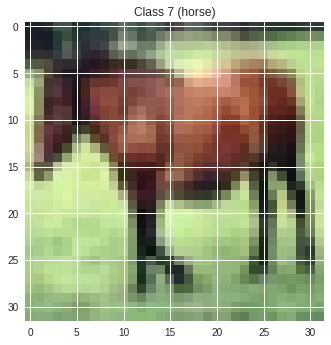

In [7]:

draw_img(7)


In [0]:
aX_train = X_train[y_train <5 ]
ay_train = Y_train[y_train <5]
aX_test=X_test[y_test <5 ]
ay_test=Y_test[y_test<5]
    
bX_train=   X_train[y_train >4 ]
by_train=   Y_train[y_train >4]
bX_test=   X_test[y_test >4 ]
by_test= Y_test[y_test>4]

In [9]:
print(aX_train.shape)
print(ay_train.shape)
print(aX_test.shape)
print(ay_test.shape)

print(bX_train.shape)
print(by_train.shape)
print(bX_test.shape)
print(by_test.shape)

(25000, 32, 32, 3)
(25000, 10)
(5000, 32, 32, 3)
(5000, 10)
(25000, 32, 32, 3)
(25000, 10)
(5000, 32, 32, 3)
(5000, 10)


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
#done above

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [31]:
##model building

#nb_epoch = 5
nb_epoch = 50
batch_size = 32

model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model1.add(Dropout(0.5))
model1.add(Dense(nb_classes, activation='softmax'))
# Compile model
lrate = 0.01
decay = lrate/nb_epoch
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
#model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
#with sgd, the accuracy was 79%, hence the optimizer is changed to Adadelta() and got 81% for test data


print(model1.summary())

print('Standard Training.')

h = model1.fit(
    aX_train,
    ay_train,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_data=(aX_test, ay_test),
    shuffle=True
)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [0]:
def show_scores(model, h, X_train, Y_train, X_test, Y_test):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    if 'val_acc' in h.history:
        print("Over fitting score   = %.6f" % over_fitting_score(h))
        print("Under fitting score  = %.6f" % under_fitting_score(h))
    print("Params count:", model.count_params())
    print("stop epoch =", max(h.epoch))
    #print("n_epoch =", h.params['n_epoch'])
    print("batch_size =", h.params['batch_size'])
    #print("n_sample =", h.params['n_sample'])
    view_acc(h)
    id = model.name[-1]
    plt.savefig(model.name + '_acc_graph.png')
    plt.show()
    view_loss(h)
    plt.savefig(model.name + '_loss_graph.png')
    plt.show()

In [0]:
def view_acc(h):
    # Accuracy history graph
    plt.plot(h.history['acc'])
    if 'val_acc' in h.history:
        plt.plot(h.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)

In [0]:
def under_fitting_score(h):
    gap = []
    for i in h.epoch:
        acc = h.history['acc'][i]
        val_acc = h.history['val_acc'][i]
        gap.append(abs(acc-val_acc))
    gap = np.array(gap)
    return gap.mean()

In [0]:
def over_fitting_score(h):
    gap = []
    n = len(h.epoch)
    for i in h.epoch:
        acc = h.history['acc'][i]
        val_acc = h.history['val_acc'][i]
        # late gaps get higher weight ..
        gap.append( i * abs(acc-val_acc))
    ofs = sum(gap) / (n * (n-1) / 2)
    return ofs

In [0]:
def view_loss(h):
    # Loss history graph
    plt.plot(h.history['loss'])
    if 'val_loss' in h.history:
        plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)

Training: accuracy   = 0.999880 loss = 0.000429
Validation: accuracy = 0.810400 loss = 1.188258
Over fitting score   = 0.185600
Under fitting score  = 0.164213
Params count: 4210090
stop epoch = 49
batch_size = 32


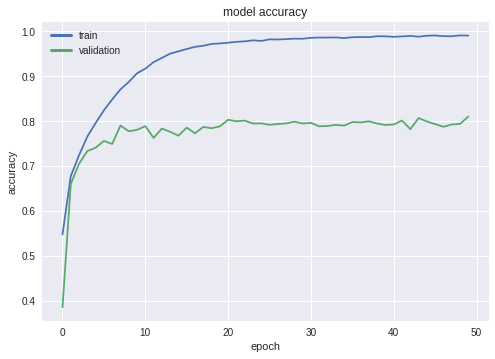

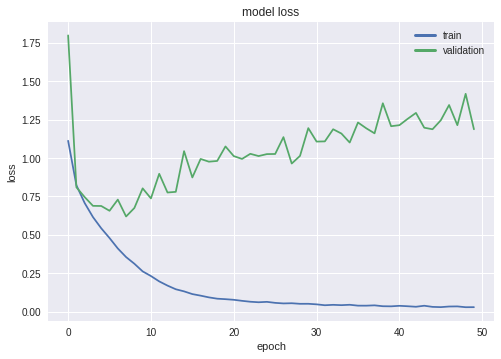

Saving model1 to the file "model1.h5"


In [33]:
show_scores(model1, h, aX_train, ay_train, aX_test, ay_test)
print('Saving model1 to the file "model1.h5"')
model1.save("model1.h5")

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [18]:
for layer in model1.layers[:8]:
       print (layer.name)
       if 'dense'  in layer.name:
         layer.trainabe=True
       if 'conv2d' in layer.name:
         layer.trainable=False

conv2d_1
dropout_1
conv2d_2
max_pooling2d_1
flatten_1
dense_1
dropout_2
dense_2


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [34]:
h = model1.fit(
    bX_train,
    by_train,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_data=(bX_test, by_test),
    shuffle=True
)

Train on 25000 samples, validate on 5000 samples
Epoch 1/50
  320/25000 [..............................] - ETA: 15s - loss: 4.8197 - acc: 0.1313

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


25000/25000 [==============================] - 13s 539us/step - loss: 0.8124 - acc: 0.7084 - val_loss: 0.4844 - val_acc: 0.8184
Epoch 2/50
25000/25000 [==============================] - 13s 538us/step - loss: 0.4541 - acc: 0.8388 - val_loss: 0.4147 - val_acc: 0.8534
Epoch 3/50
25000/25000 [==============================] - 13s 536us/step - loss: 0.3522 - acc: 0.8752 - val_loss: 0.3887 - val_acc: 0.8588
Epoch 4/50
25000/25000 [==============================] - 13s 534us/step - loss: 0.2788 - acc: 0.9000 - val_loss: 0.3764 - val_acc: 0.8658
Epoch 5/50
25000/25000 [==============================] - 13s 537us/step - loss: 0.2275 - acc: 0.9192 - val_loss: 0.3623 - val_acc: 0.8748
Epoch 6/50
25000/25000 [==============================] - 13s 534us/step - loss: 0.1818 - acc: 0.9362 - val_loss: 0.3986 - val_acc: 0.8764
Epoch 7/50
25000/25000 [==============================] - 13s 536us/step - loss: 0.1579 - acc: 0.9448 - val_loss: 0.3846 - val_acc: 0.8822
Epoch 8/50
25000/25000 [==============

Training: accuracy   = 0.999880 loss = 0.000371
Validation: accuracy = 0.886000 loss = 0.659235
Over fitting score   = 0.106365
Under fitting score  = 0.096260
Params count: 4210090
stop epoch = 49
batch_size = 32


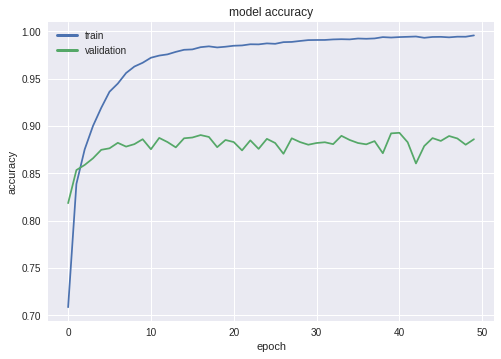

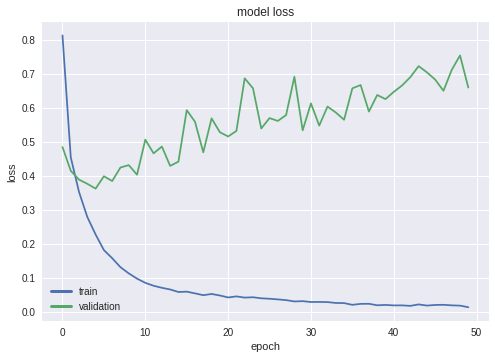

Saving model1 to the file "model1.h5"


In [35]:
show_scores(model1, h, bX_train, by_train, bX_test, by_test)
print('Saving model1 to the file "model1.h5"')
model1.save("model2.h5")

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [23]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [25]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [26]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [27]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:

def print_report(pipe):
    y_test = twenty_test.target
    y_pred = pipe.predict(twenty_test.data)
    report = metrics.classification_report(y_test, y_pred,
        target_names=twenty_test.target_names)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))



In [0]:
 vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95)
 train_data = vectorizer.fit_transform(twenty_train.data)
 test_data = vectorizer.transform(twenty_test.data)
 #train_data = train_data.todense()
 #test_data = test_data.todense()
 train_labels =twenty_train.target
 test_labels = twenty_test.target

 
    
    

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [30]:
logreg = LogisticRegression(C=1e9)
logreg.fit(train_data, train_labels)
logreg.score(test_data,test_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8948069241011984